Q.1.

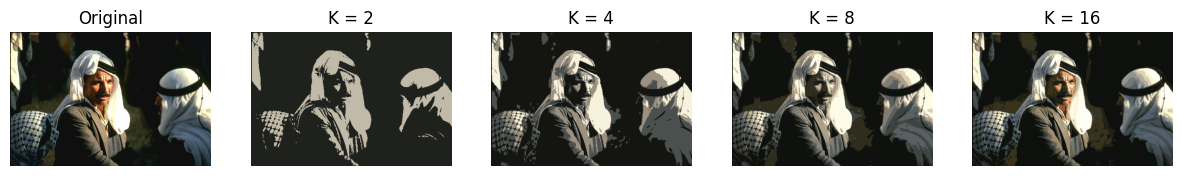

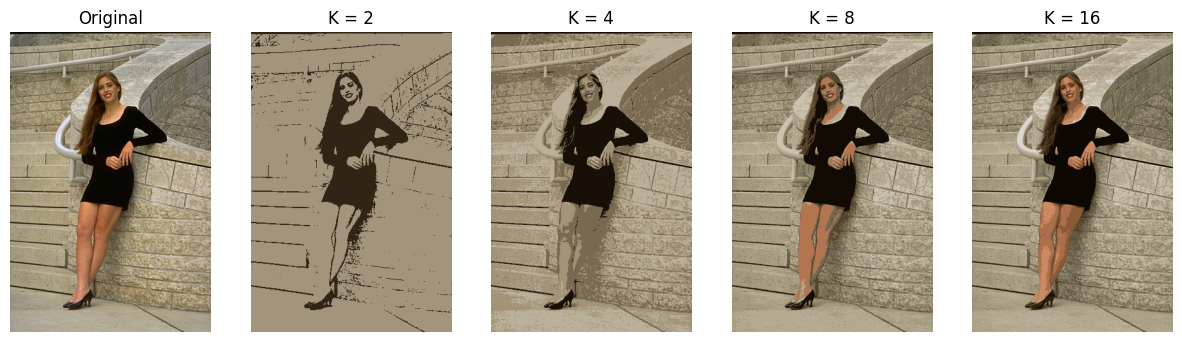

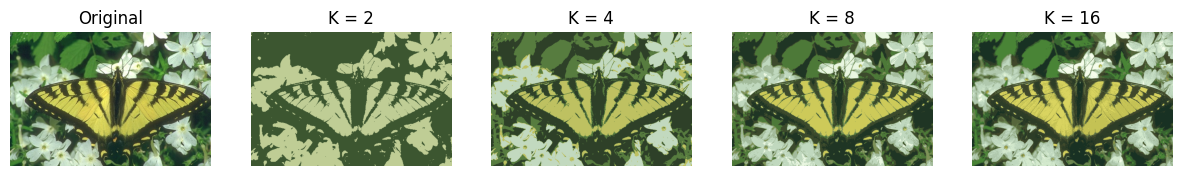

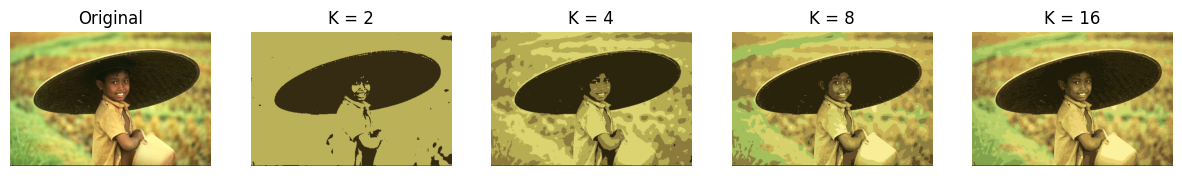

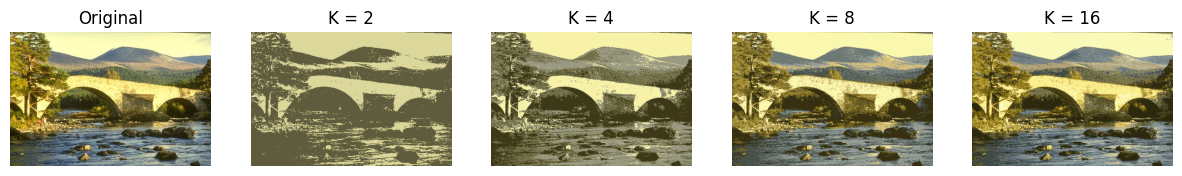

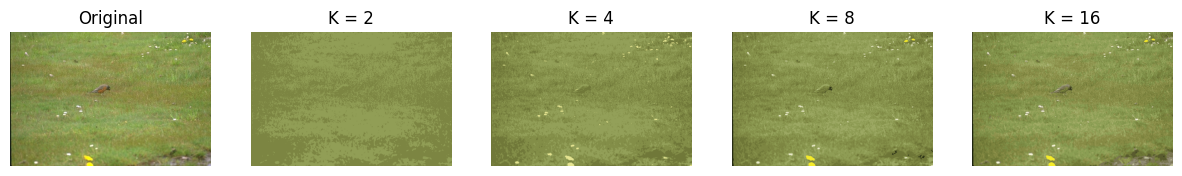

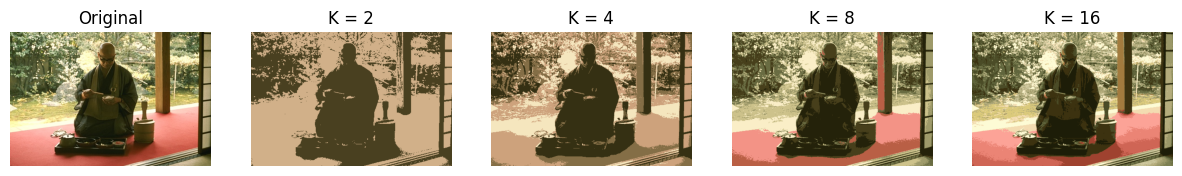

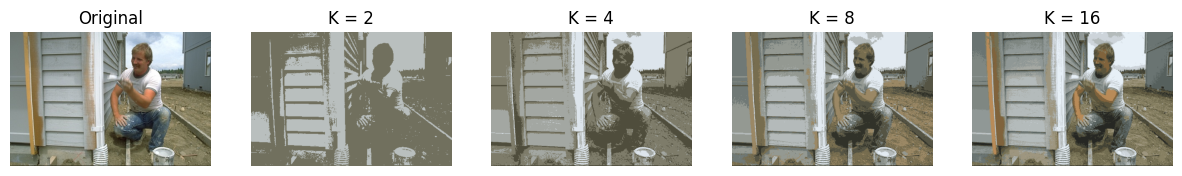

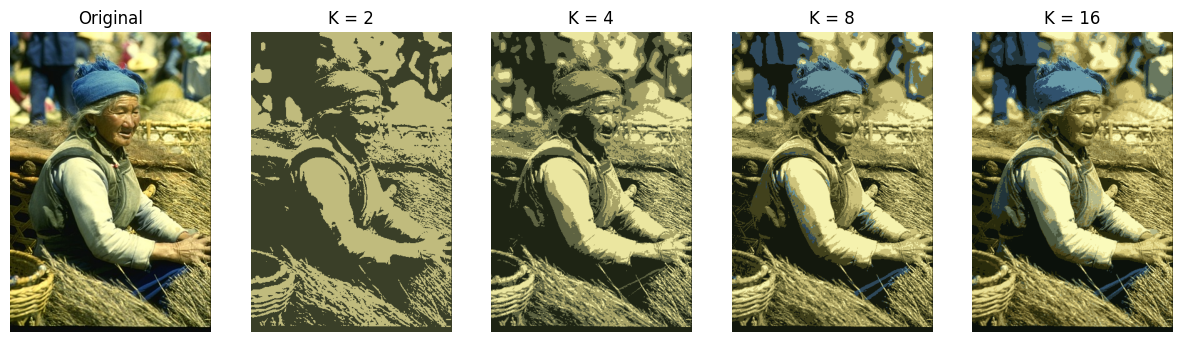

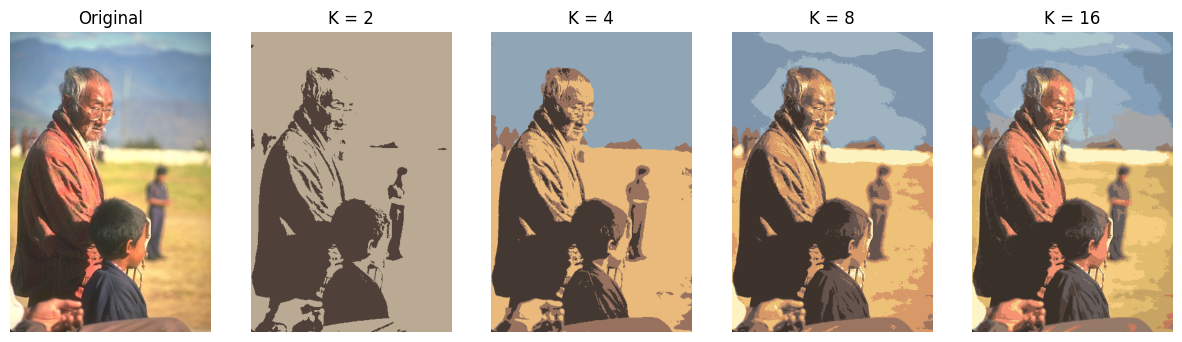

Evaluating Image...

BDE for K=2: 0.8382
BDE for K=4: 0.7809
BDE for K=8: 0.7280
BDE for K=16: 0.6379


Evaluating Image...

BDE for K=2: 0.9771
BDE for K=4: 0.9542
BDE for K=8: 0.9292
BDE for K=16: 0.9010


Evaluating Image...

BDE for K=2: 0.9736
BDE for K=4: 0.9619
BDE for K=8: 0.9498
BDE for K=16: 0.9345


Evaluating Image...

BDE for K=2: 0.9743
BDE for K=4: 0.9570
BDE for K=8: 0.9416
BDE for K=16: 0.9192


Evaluating Image...

BDE for K=2: 0.9702
BDE for K=4: 0.9499
BDE for K=8: 0.9240
BDE for K=16: 0.8786


Evaluating Image...

BDE for K=2: 0.9402
BDE for K=4: 0.9292
BDE for K=8: 0.9138
BDE for K=16: 0.8991


Evaluating Image...

BDE for K=2: 0.9728
BDE for K=4: 0.9588
BDE for K=8: 0.9360
BDE for K=16: 0.9196


Evaluating Image...

BDE for K=2: 0.9799
BDE for K=4: 0.9677
BDE for K=8: 0.9524
BDE for K=16: 0.9320


Evaluating Image...

BDE for K=2: 0.9794
BDE for K=4: 0.9651
BDE for K=8: 0.9502
BDE for K=16: 0.9145


Evaluating Image...

BDE for K=2: 0.9775
BDE for K=4: 0.9620
BDE

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.metrics import adapted_rand_error

data_folders = {
    'train': '/content/drive/MyDrive/MTech/Semester 2/Machine Learning/Practical/Assign8/test',
    'test': '/content/drive/MyDrive/MTech/Semester 2/Machine Learning/Practical/Assign8/train',
    'val': '/content/drive/MyDrive/MTech/Semester 2/Machine Learning/Practical/Assign8/val'
}

def load_images(directory, num_samples=3):
    image_list = []
    file_names = os.listdir(directory)[:num_samples]
    for file in file_names:
        img_path = os.path.join(directory, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            image_list.append(img)
    return image_list

def perform_kmeans_segmentation(image, num_clusters):
    height, width, channels = image.shape
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixel_values)
    cluster_centers = kmeans.cluster_centers_

    segmented_image = cluster_centers[labels].reshape((height, width, channels))
    segmented_image = np.uint8(segmented_image)

    return segmented_image

def display_kmeans_results(image_list, cluster_counts):
    for img in image_list:
        fig, axes = plt.subplots(1, len(cluster_counts) + 1, figsize=(15, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original")
        axes[0].axis("off")

        for i, num_clusters in enumerate(cluster_counts):
            segmented_img = perform_kmeans_segmentation(img, num_clusters)
            axes[i+1].imshow(segmented_img)
            axes[i+1].set_title(f"K = {num_clusters}")
            axes[i+1].axis("off")

        plt.show()

def compute_bde(original_img, segmented_img):
    error, *_ = adapted_rand_error(original_img, segmented_img)
    return error

def assess_segmentation(image_list, cluster_counts):
    for img in image_list:
        print("Evaluating Image...\n")
        for num_clusters in cluster_counts:
            segmented_img = perform_kmeans_segmentation(img, num_clusters)
            bde_score = compute_bde(img, segmented_img)
            print(f"BDE for K={num_clusters}: {bde_score:.4f}")
        print("\n")

test_images = load_images(data_folders["test"], num_samples=10)

cluster_options = [2, 4, 8, 16]

display_kmeans_results(test_images, cluster_options)

assess_segmentation(test_images, cluster_options)

2. How does the choice of K affect the segmentation results?


The choice of
K plays a crucial role in determining the quality of segmentation in K-Means clustering. When
K is small (e.g., 2 or 3), the segmentation is too broad, grouping large regions together and losing finer details. This can be useful for binary segmentation but fails for complex images. As
K increases (e.g., 4 to 8), the segmentation becomes more refined, balancing structure preservation and avoiding excessive fragmentation. However, setting
K too high (e.g., 16 or more) leads to over-segmentation, where the image is divided into many small, unnecessary regions. This not only increases computational cost but can also degrade segmentation quality. In terms of Boundary Displacement Error (BDE), lower
K values often result in higher errors due to oversimplification, whereas excessively high
K values may introduce inconsistencies.

3. What are the limitations of using K-Means for image segmentation?


K-Means clustering has several limitations when used for image segmentation. First, it assumes that clusters are spherical and evenly distributed, which is often not the case in real-world images. Second, it requires a predefined value of
K, making it challenging to determine the optimal number of clusters without prior knowledge or additional techniques like the Elbow Method. Another drawback is its sensitivity to the initial placement of centroids, which can lead to inconsistent segmentation results. Additionally, K-Means considers only color similarity and ignores spatial relationships between pixels, causing scattered noise and potential misclassification of adjacent pixels. It is also highly sensitive to illumination changes, making segmentation results unreliable under varying lighting conditions. Due to these limitations, alternative approaches such as Gaussian Mixture Models (GMM), Mean Shift, and deep learning-based methods like CNNs and U-Nets are often preferred for more complex image segmentation tasks.